## Importing useful packages

In [28]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%matplotlib notebook

## Initializing constants

In [29]:
k = 0.3    # Thermal conductivity coefficient
Lx = 10    # Width
Ly = 10    # Length

n = 250    # Spatial precision 
nx = n     # X axis precision
ny = n     # Y axis precision 

dx = Lx/nx # X axis step size
dy = Ly/ny # Y axis step size

xx = np.linspace(-Lx/2, Lx/2, nx + 1) # X Axis
yy = np.linspace(-Ly/2, Ly/2, ny + 1) # Y Axis

Tf = 8     # Integration time
dt = 0.001 # Time step

SOL = []  # Stores the evolution of T

## Setting boundary contitions first example :

In [30]:
T   = np.zeros((nx + 1, ny + 1))    # Initial temperature equal to zero inside the domain
RHS = np.zeros((nx + 1, ny + 1))    # Initial temperature constant so RHS vanishes

T[:,0] = 200  # Left boundary condition 
T[:,n] = 200  # Right boundary condition

SOL.append(T)

## Main Loop 

In [31]:
for t in range(int(Tf/dt)):
    # Computing RHS using a first order schema
    RHS[1:-1,1:-1] = dt*k*(T[:-2,1:-1] - 2*T[1:-1,1:-1] + T[2:,1:-1] + T[1:-1,:-2] - 2*T[1:-1,1:-1] + T[1:-1,2:])/(dx**2)
    
    # Update T : T <- T + Tdot*dt
    T = T + RHS
    if t % 500 == 0:
        SOL.append(T)

## Visualization

<IPython.core.display.Javascript object>


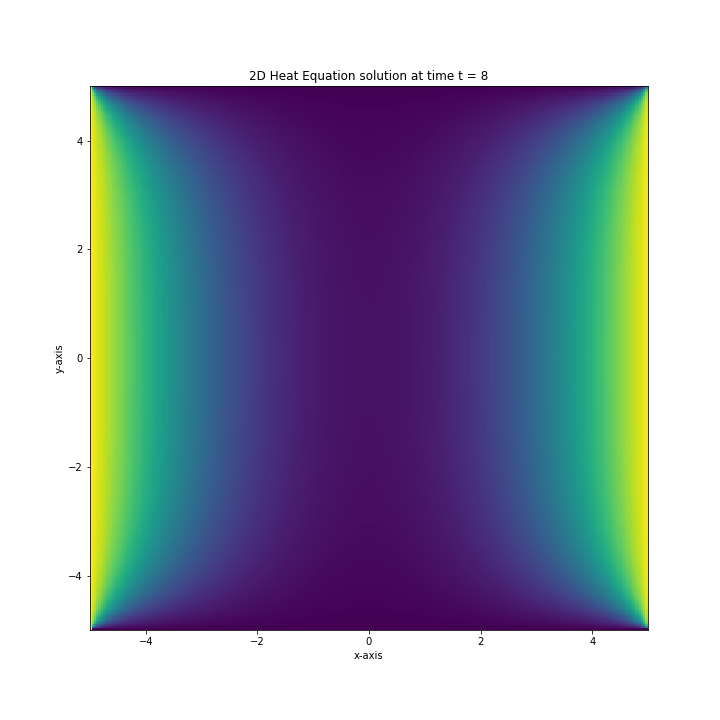

In [32]:
plt.figure(figsize=(10, 10))
plt.title('2D Heat Equation solution at time t = {}'.format(Tf))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.pcolor(xx, yy, T)
plt.show()

## Different boundary conditions heat diffusion inside the domain

In [39]:
T2   = np.zeros((nx + 1, ny + 1))    # Initial temperature equal to zero inside the domain
RHS  = np.zeros((nx + 1, ny + 1))    # Initial temperature constant so RHS vanishes

T2[20:30,20:30]     = 200  # Left boundary condition 
T2[150:160,150:160] = 200  # Right boundary condition

Tf2 = 3

SOL2 = []  # Stores the evolution of T2
SOL2.append(T2)

## Main Loop Example 2 :

In [40]:
for t in range(int(Tf2/dt)):
    # Computing RHS using a first order schema
    RHS[1:-1,1:-1] = dt*k*(T2[:-2,1:-1] - 2*T2[1:-1,1:-1] + T2[2:,1:-1] + T2[1:-1,:-2] - 2*T2[1:-1,1:-1] + T2[1:-1,2:])/(dx**2)
    
    # Update T : T <- T + Tdot*dt
    T2 = T2 + RHS
    if t % 500 == 0:
        SOL2.append(T2)

## Visualization

<IPython.core.display.Javascript object>


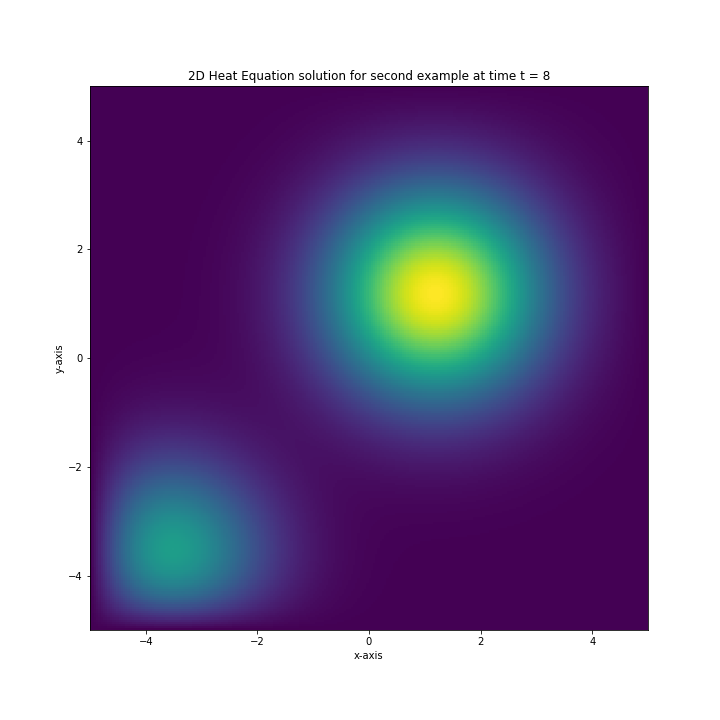

In [41]:
plt.figure(figsize=(10, 10))
plt.title('2D Heat Equation solution for second example at time t = {}'.format(Tf))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.pcolor(xx, yy, T2)
plt.show()

## Different boundary conditions thermal source

In [36]:
T3   = np.zeros((nx + 1, ny + 1))    # Initial temperature equal to zero inside the domain
RHS  = np.zeros((nx + 1, ny + 1))    # Initial temperature constant so RHS vanishes

T3[20:30,20:30]     = 200  # Thermal source 
T3[150:160,150:160] = 200  # Thermal source

SOL3 = []  # Stores the evolution of T2
SOL3.append(T3)

## Main Loop Example 3 :

In [37]:
for t in range(int(Tf/dt)):
    # Computing RHS using a first order schema
    RHS[1:-1,1:-1] = dt*k*(T3[:-2,1:-1] - 2*T3[1:-1,1:-1] + T3[2:,1:-1] + T3[1:-1,:-2] - 2*T3[1:-1,1:-1] + T3[1:-1,2:])/(dx**2)
        
    # Update T : T <- T + Tdot*dt
    T3 = T3 + RHS
    T3[20:30,20:30]     = 200  # Thermal source 
    T3[150:160,150:160] = 200  # Thermal source

    
    if t % 500 == 0:
        SOL3.append(T3)

## Visualization

<IPython.core.display.Javascript object>


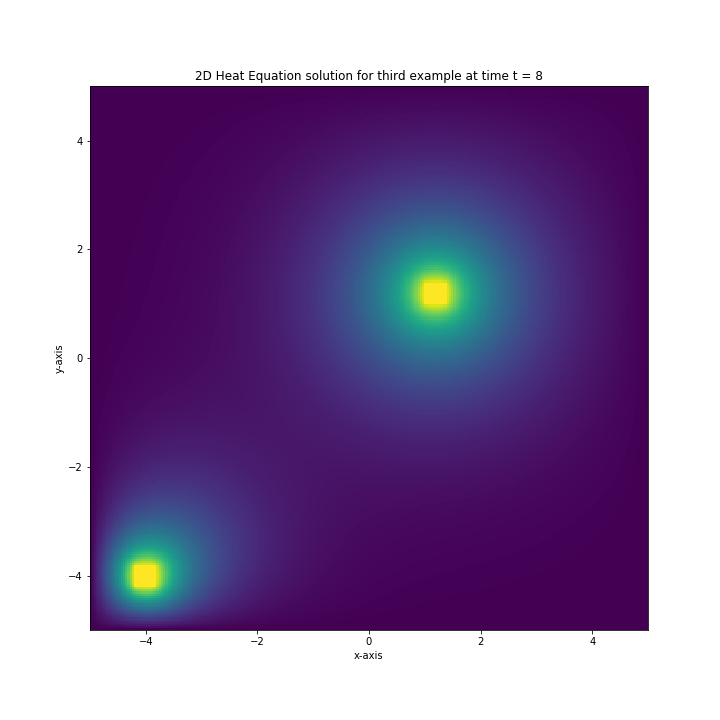

In [38]:
plt.figure(figsize=(10, 10))
plt.title('2D Heat Equation solution for third example at time t = {}'.format(Tf))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.pcolor(xx, yy, T3)
plt.show()